In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from numpy.distutils.system_info import x11_info

In [16]:
pd.set_option("max_rows", 25)

In [17]:
# Apply the default theme
sns.set_theme()
sns.set_style("whitegrid")

In [18]:
data_path = '/home/achara/data/achara/'

In [19]:
df = pd.read_csv(data_path + 'final_vp_data_2017_to_2019.csv')

In [20]:
df.head()

SensorDepth_Water_EXO  PC_Water_EXO  Chla_Water_EXO  DO_Water_EXO  \
0                   1.01        0.1556        0.358058          9.17   
1                   1.03        0.1520        0.544445          9.18   
2                   1.05        0.1304        0.843708          9.16   
3                   1.07        0.1592        0.939807          9.16   
4                   1.09        0.1340        0.797623          9.15   

   DO-Sat_Water_EXO  SpCond_Water_EXO  Temperature_Water_EXO  pH_Water_EXO  \
0        101.610000        139.810000              20.380000      8.010344   
1        101.776667        139.786667              20.386667      8.027139   
2        101.230000        139.660000              20.220000      8.019958   
3        101.590000        139.780000              20.410000      8.038803   
4        101.490000        139.750000              20.420000      8.024188   

   rel_fl  month  ...         TP       TSP       SRP        TN    NO3    NH4  \
0   0.880     10  ...  25.691678  9.009938  5.594708  0.498284  0.191  0.005   
1   0.862     10  ...  25.691678  9.009938  5.594708  0.498284  0.191  0.005   
2   0.844     10  ...  25.691678  9.009938  5.594708  0.498284  0.191  0.005   
3   0.826     10  ...  25.691678  9.009938  5.594708  0.498284  0.191  0.005   
4   0.835     10  ...  25.691678  9.009938  5.594708  0.498284  0.191  0.005   

          PP  PRECTOTCORR  ALLSKY_SFC_SW_DWN  ALLSKY_SFC_LW_DWN  
0  16.681741     4.319851           2.424178         310.373726  
1  16.681741     4.319851           2.424178         310.373726  
2  16.681741     4.319851           2.424178         310.373726  
3  16.681741     4.319851           2.424178         310.373726  
4  16.681741     4.319851           2.424178         310.373726  

[5 rows x 23 columns]

## Exploring our target variable `PC_Water_EXO`

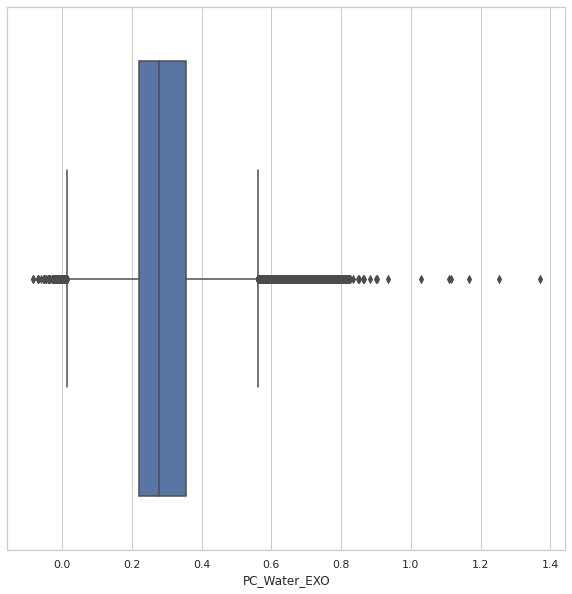

In [21]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=df, x='PC_Water_EXO', orient='h')
plt.show()

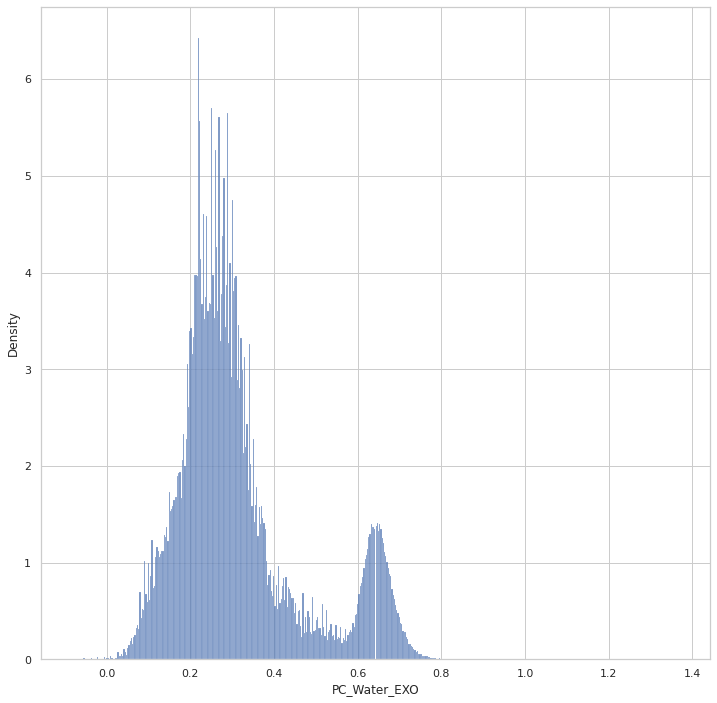

In [22]:
plt.figure(figsize=(12, 12))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=500)
plt.show()

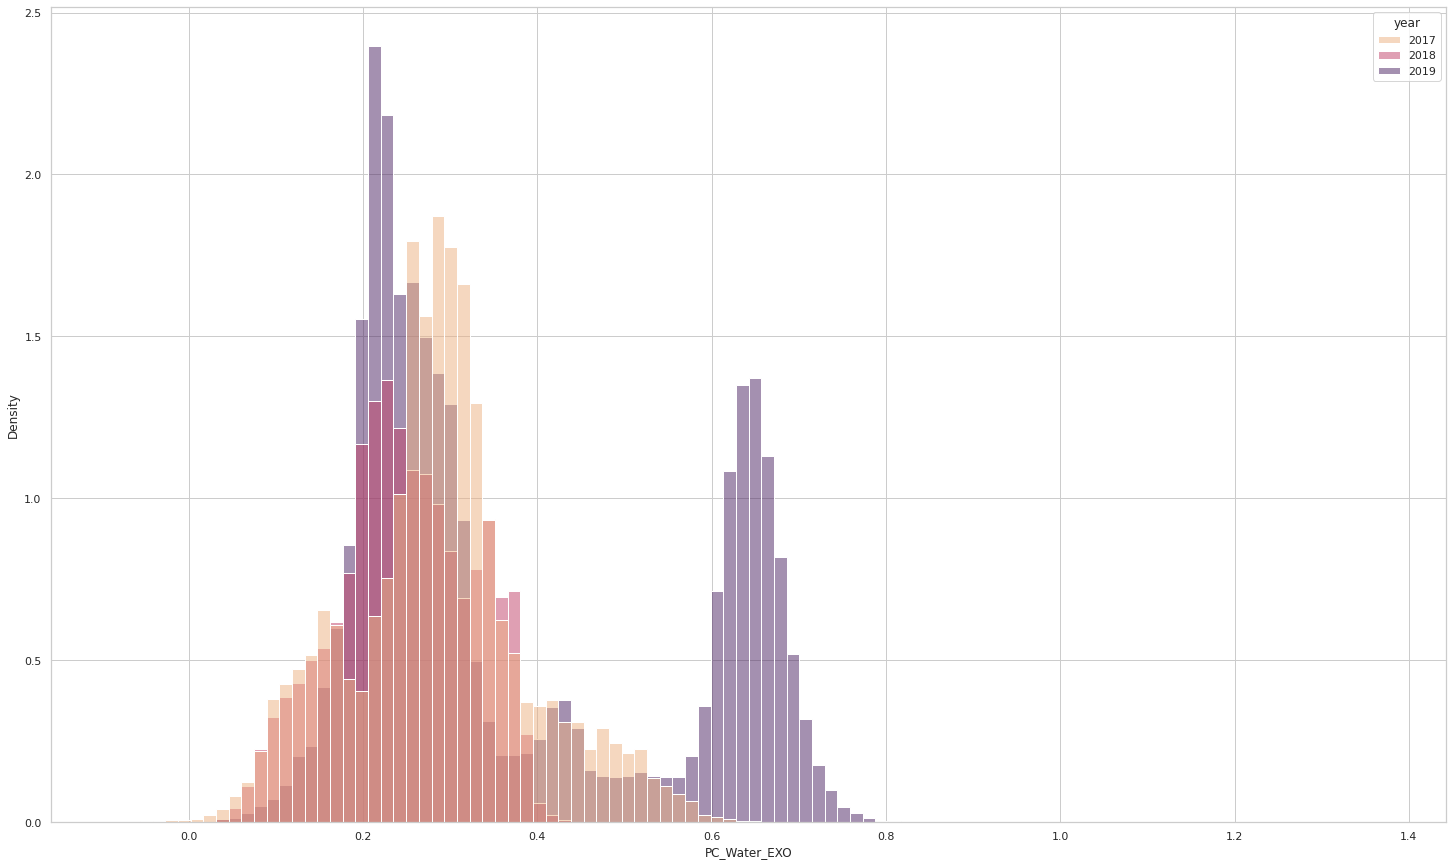

In [23]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df, x='PC_Water_EXO', stat='density', bins=100, hue='year', palette='flare')
plt.show()

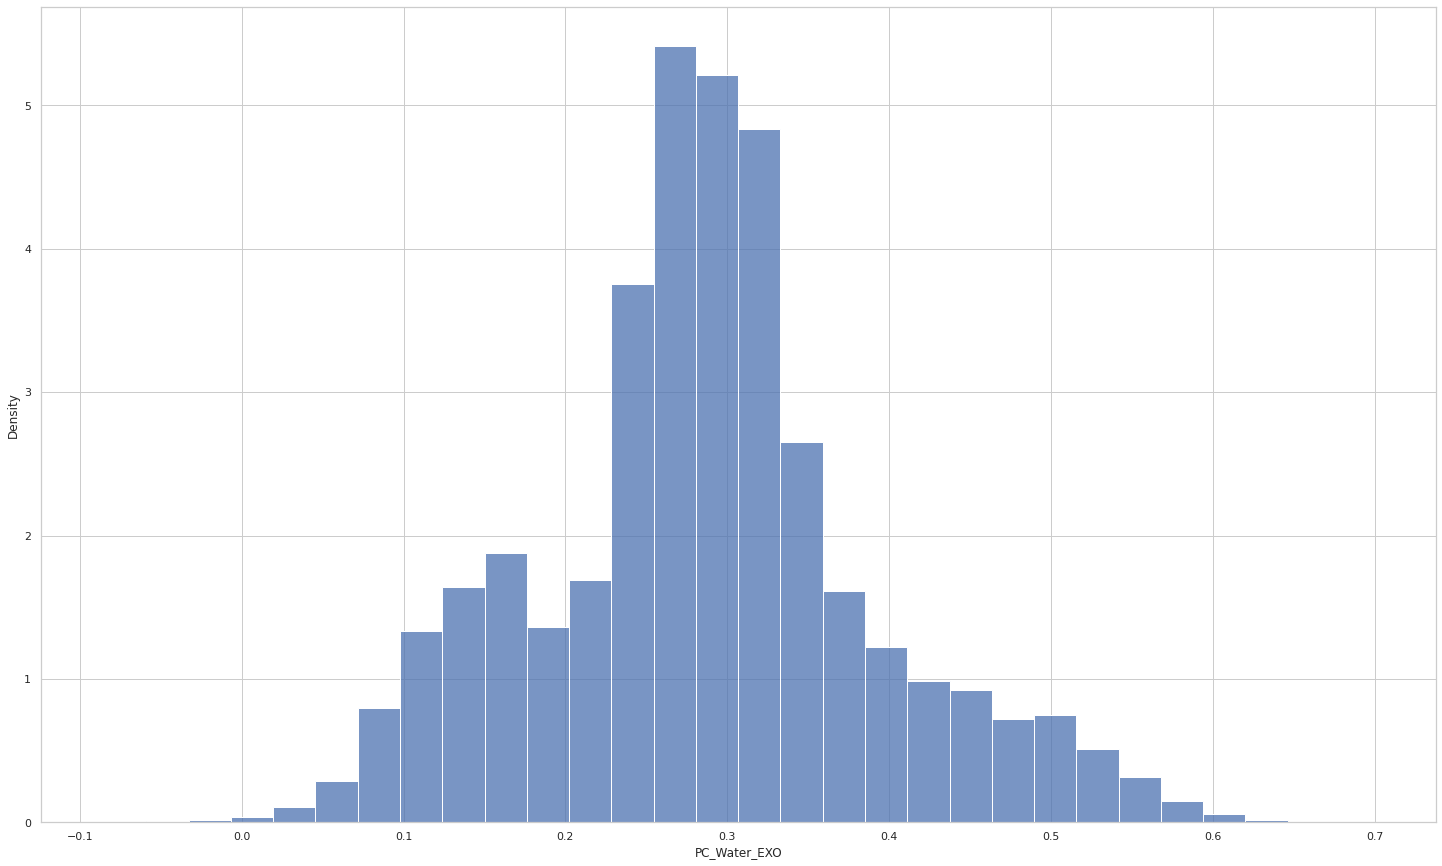

In [24]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2017"), x='PC_Water_EXO', stat='density', bins=30, palette='flare')
plt.show()

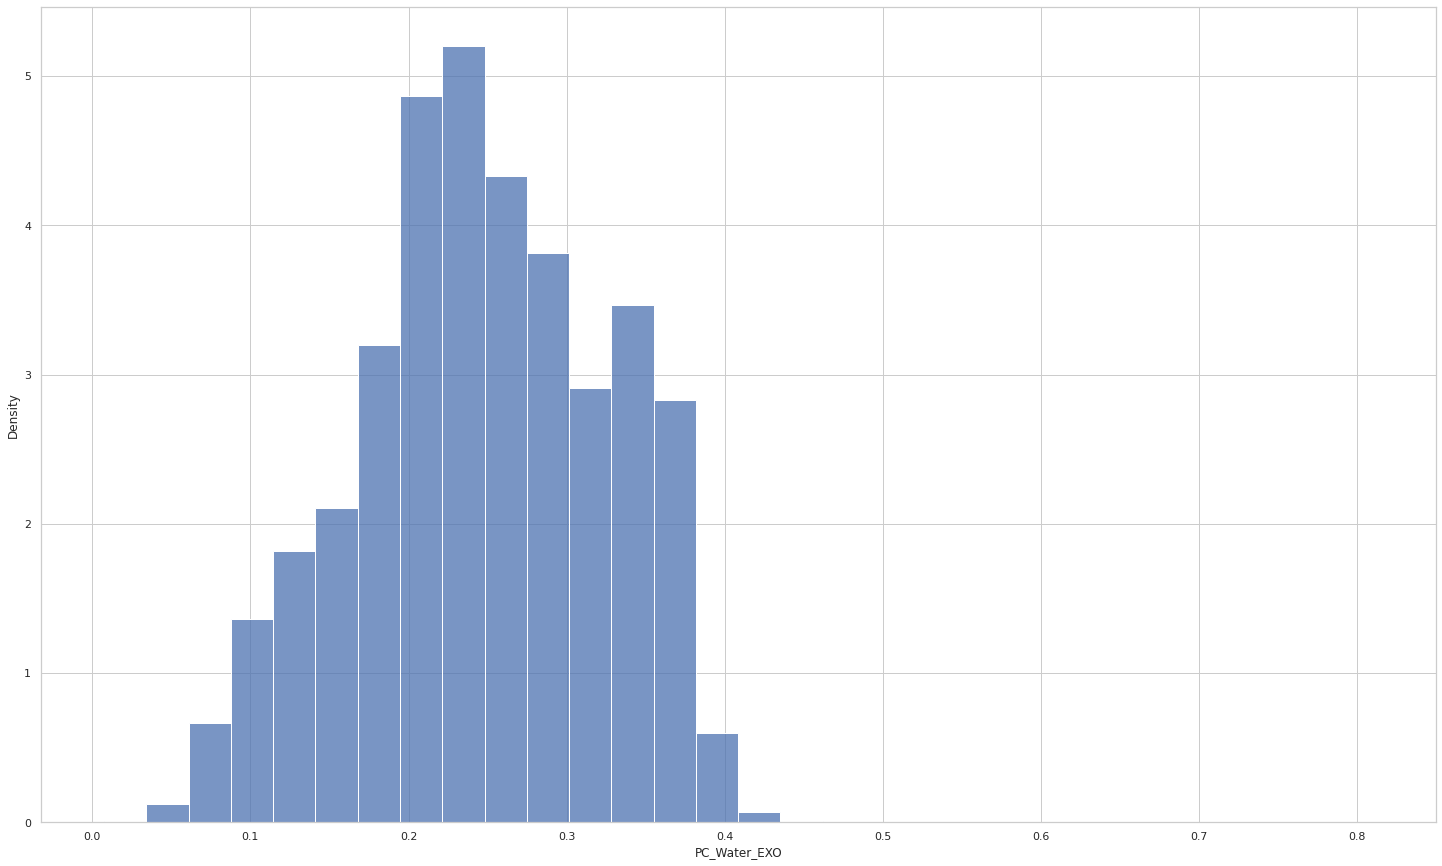

In [25]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2018"), x='PC_Water_EXO', stat='density', bins=30, palette='flare')
plt.show()

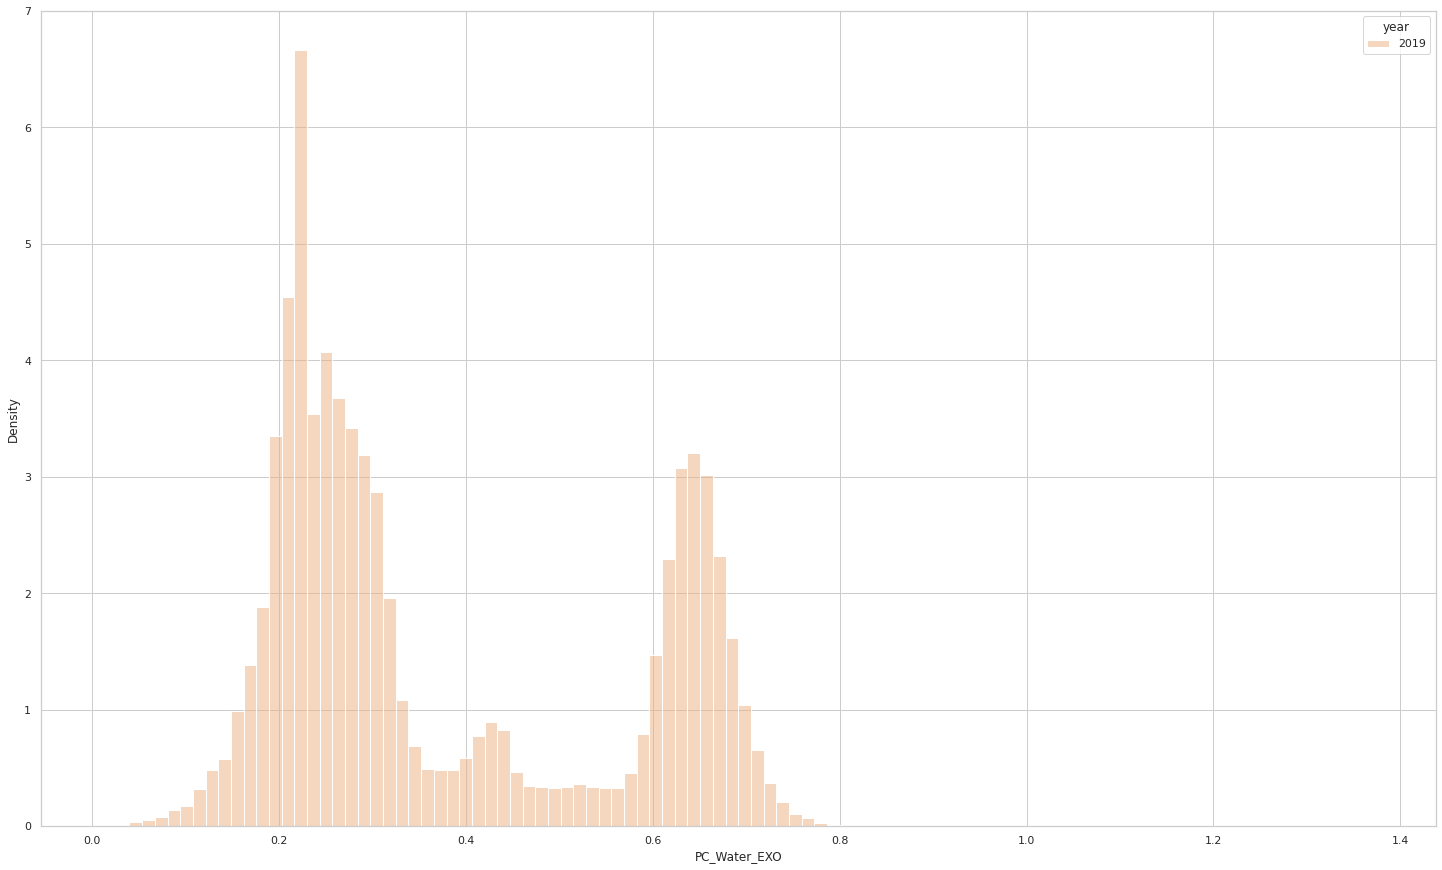

In [26]:
plt.figure(figsize=(25, 15))
sns.histplot(data=df.query("`year`==2019"), x='PC_Water_EXO', stat='density', bins=100, hue='year', palette='flare')
plt.show()

## Observation:

1. Some `PC_Water_EXO` values are negative. We need to do some data cleaning around these values.

In [27]:
df = df.query("`PC_Water_EXO` >= 0")

In [28]:
df['PN'] = df.TP/df.TN

## Exploring the correlations

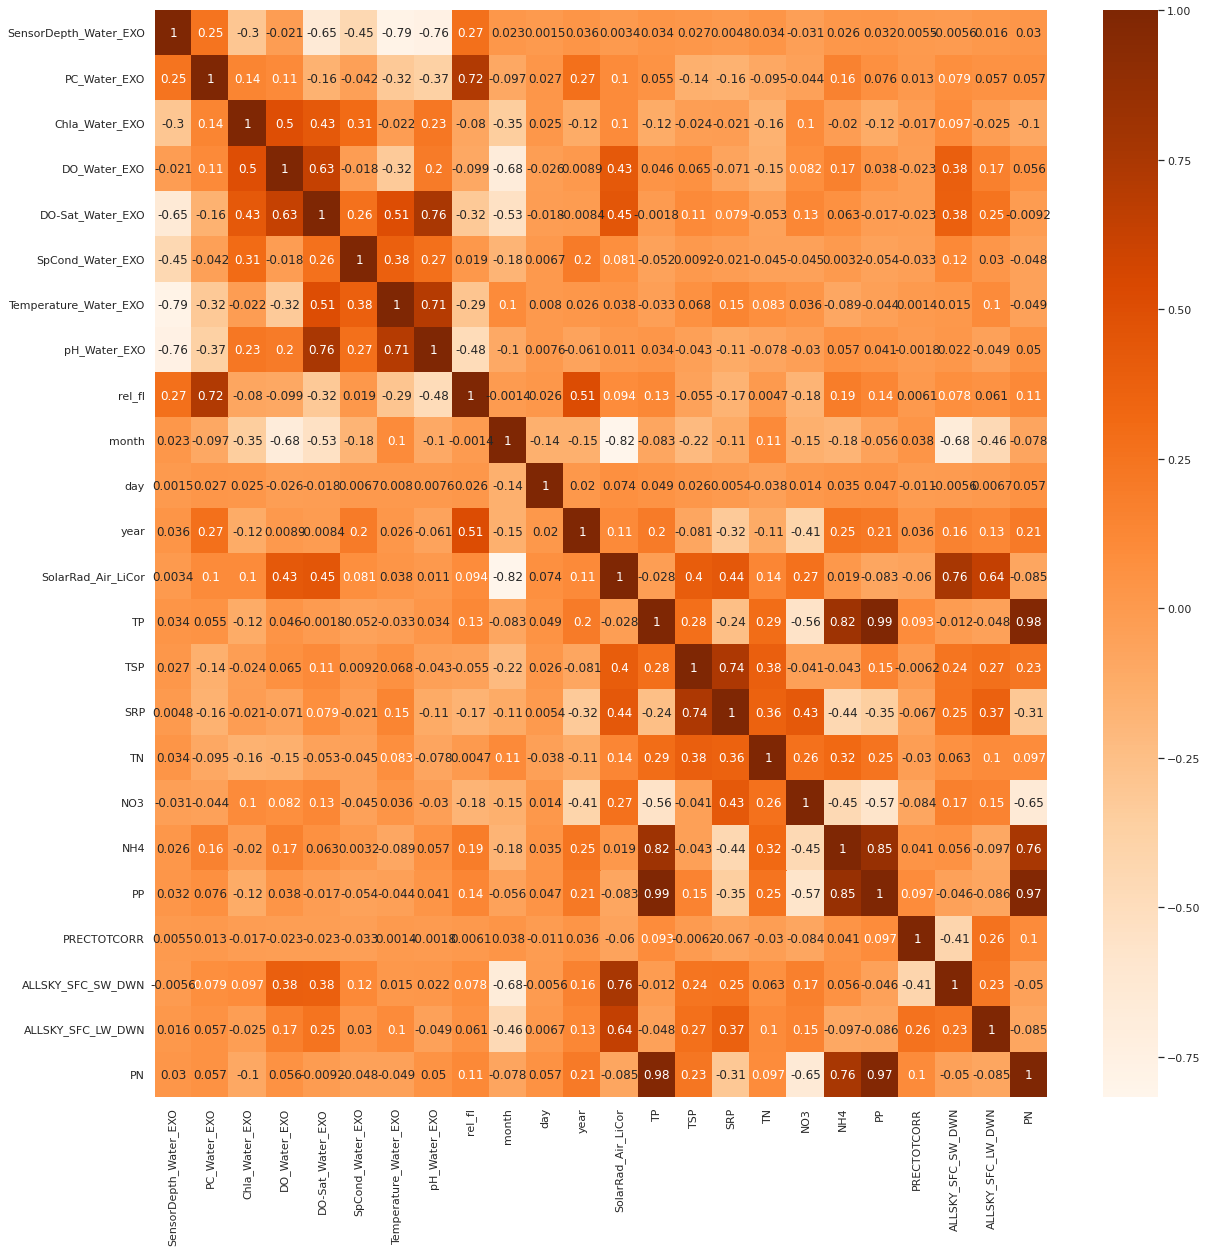

In [29]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), cbar=True, annot=True, cmap='Oranges')
plt.show()

## Observation:

Phycocyanin has good correlations with:
1. Sensor depth
2. Chlorophyl A
3. Solar Radiation
4. Dissolved Oxygen
5. pH of water (negatively)
6. Water temperature (negatively)
7. Relative fluorescence

Let's start with

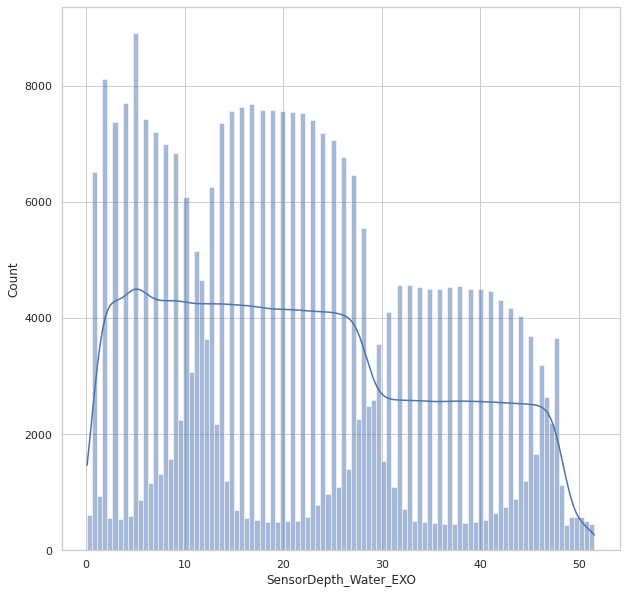

In [30]:
plt.figure(figsize=(10, 10))
sns.histplot(data=df, x='SensorDepth_Water_EXO', bins=100, kde=True)
plt.show()

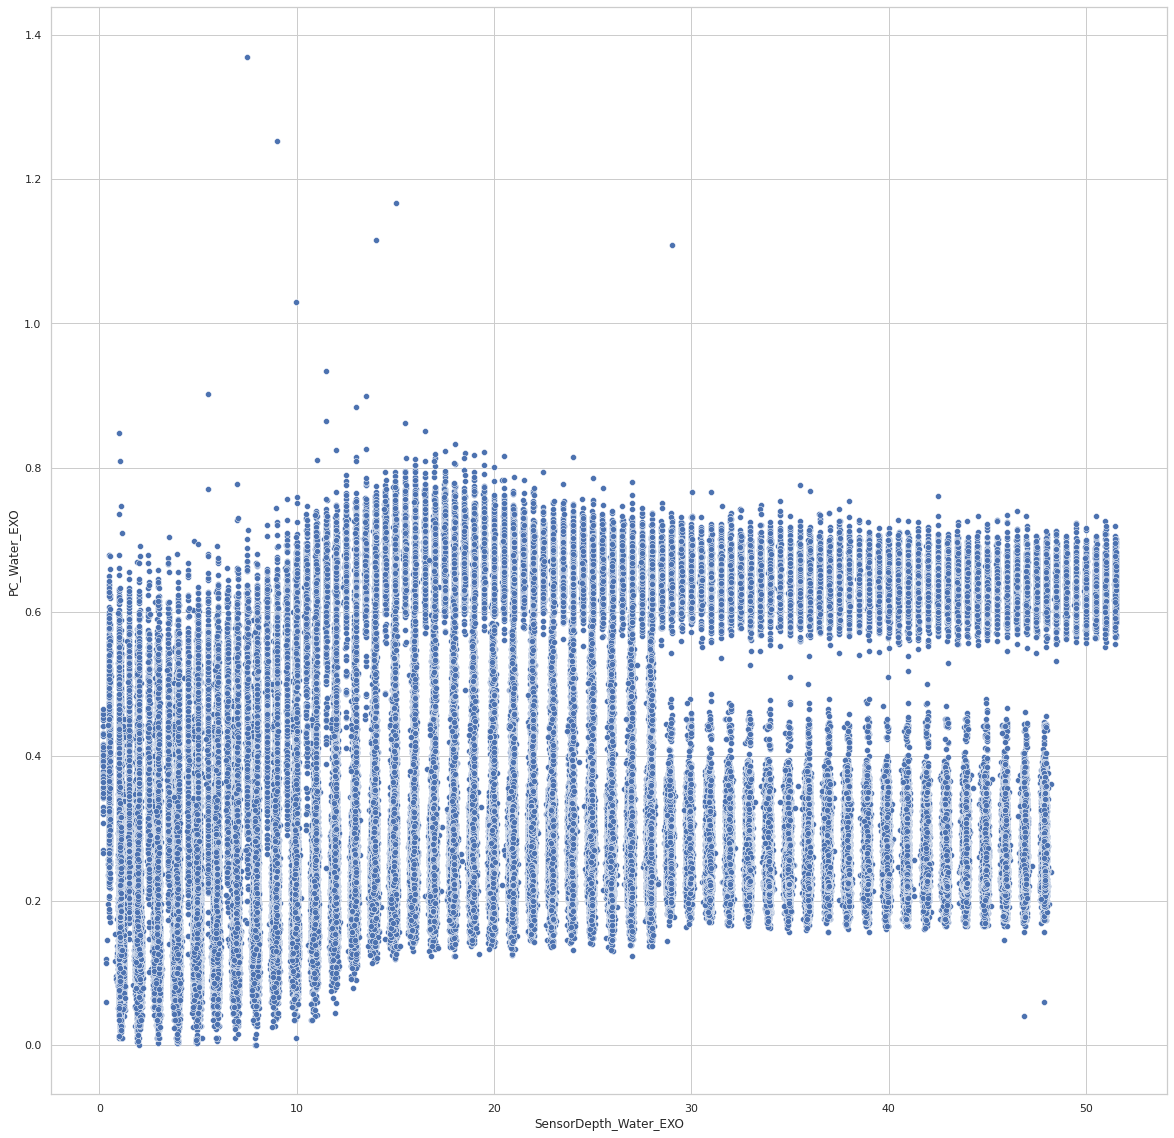

In [31]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO')
plt.show()

## Observation

1. Phycocyanin concentrations appear to be in clusters at different levels of sensor depth.
2. There seems to be more phycocyanin concentration towards the surface and reduces at deeper depths of the lake.

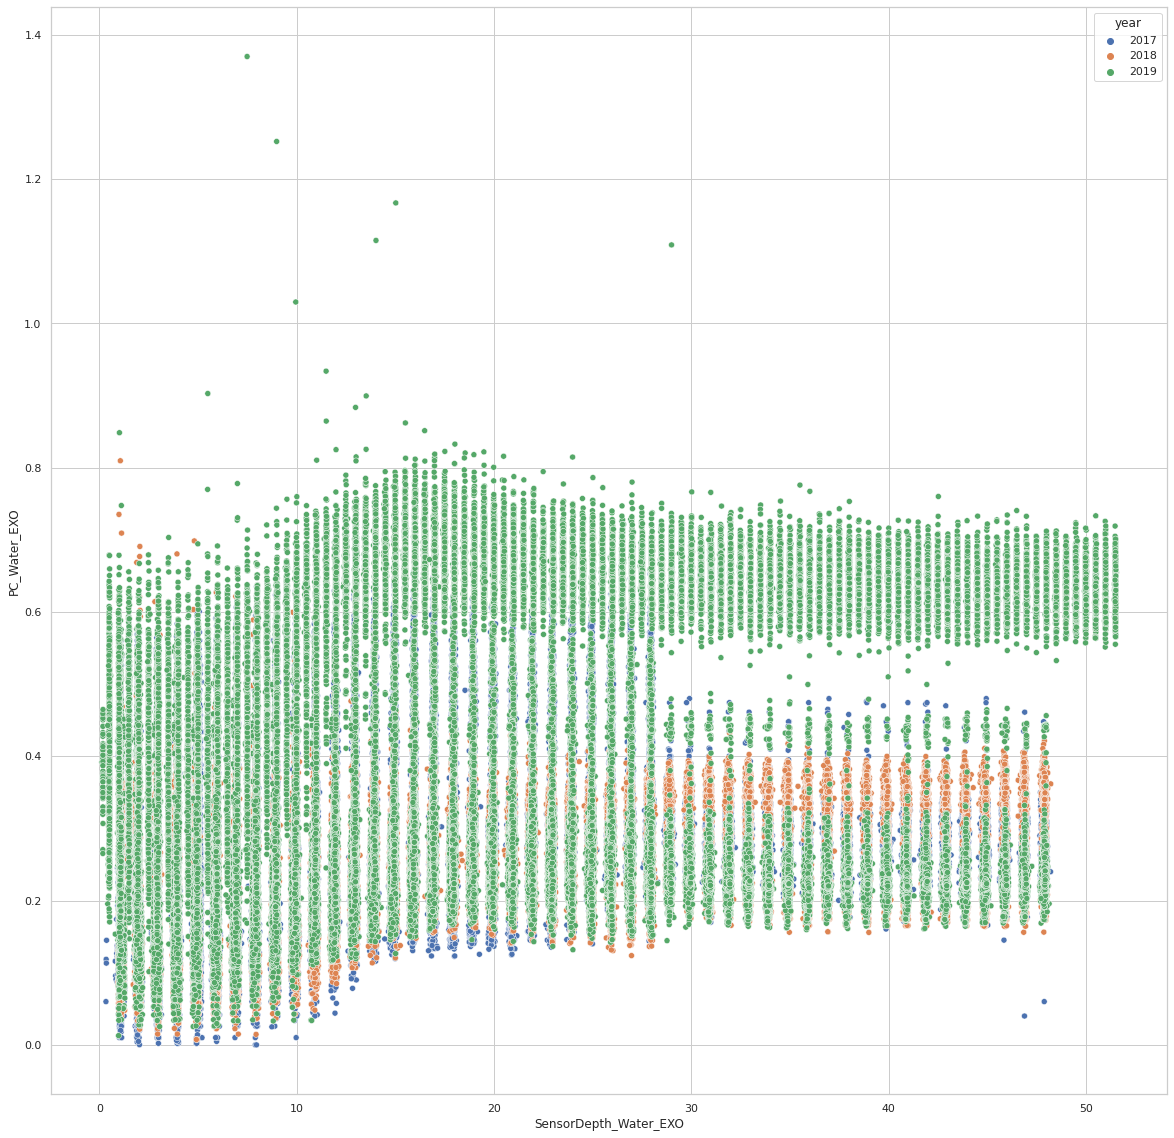

In [32]:
plt.figure(figsize=(20, 20))
sns.scatterplot(data=df, x='SensorDepth_Water_EXO', y='PC_Water_EXO', hue='year', palette='deep')
plt.show()

## Observation:

Phycocyanin level is higher in the year 2019, followed by 2017, 2018. Let's confirm this observation

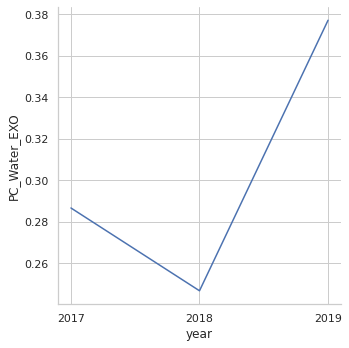

In [33]:
mean_pc_by_yr = df.groupby('year', as_index=False)['PC_Water_EXO'].mean()
mean_pc_by_yr.year = mean_pc_by_yr.year.astype('str')
sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

### Need to explore what changed from 2017 to 2018 and did the factors reverse from 2018 to 2019?

In [34]:
df.columns

Index(['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'PN'],
      dtype='object')

In [35]:
df_mean = df.groupby('year', as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
                                              'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
                                              'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl',
                                              'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4', 'PP', 'PN']].mean()

df_mean.year = df_mean.year.astype('str')
df_mean.head()

year  PC_Water_EXO  Chla_Water_EXO  DO_Water_EXO  DO-Sat_Water_EXO  \
0  2017      0.286553        1.826674     10.129781         93.689220   
1  2018      0.246642        2.349001     10.533959         95.341475   
2  2019      0.377043        1.498548     10.185903         93.537137   

   SpCond_Water_EXO  Temperature_Water_EXO  pH_Water_EXO    rel_fl  \
0        140.482876              11.099639      7.471491  1.358089   
1        143.578668              11.313672      7.422336  1.248319   
2        142.489706              11.429975      7.424284  2.075108   

   SolarRad_Air_LiCor         TP       TSP       SRP        TN       NO3  \
0          190.239819  10.979225  5.803439  4.345837  0.508051  0.380237   
1          181.204093  12.848301  6.284546  4.316395  0.489682  0.278849   
2          204.334138  15.077052  5.621447  3.508522  0.488017  0.276531   

        NH4        PP         PN  
0  0.006792  5.175787  21.845607  
1  0.007070  6.563755  26.753805  
2  0.009782  9.455605  29.718899

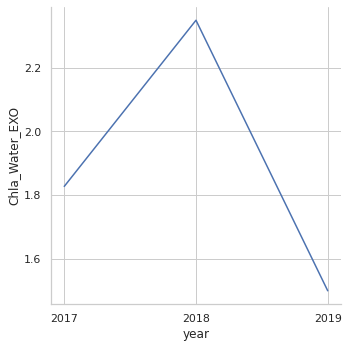

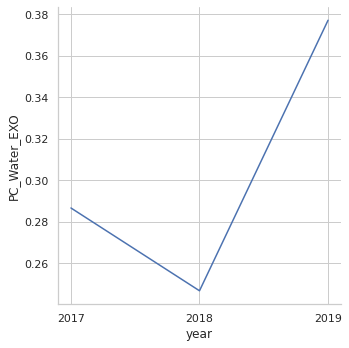

In [36]:
sns.relplot(data=df_mean, x='year', y='Chla_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

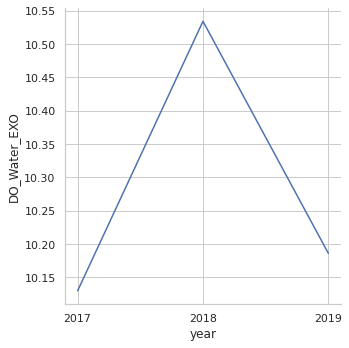

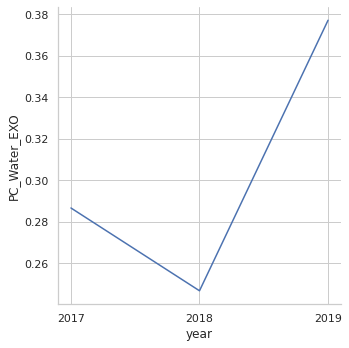

In [37]:
sns.relplot(data=df_mean, x='year', y='DO_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

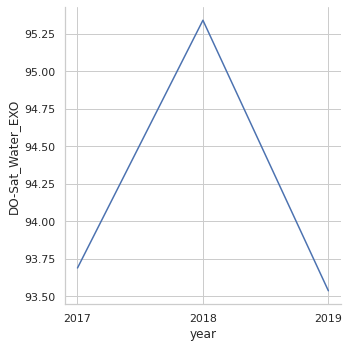

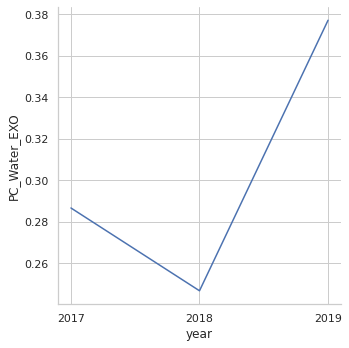

In [38]:
sns.relplot(data=df_mean, x='year', y='DO-Sat_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

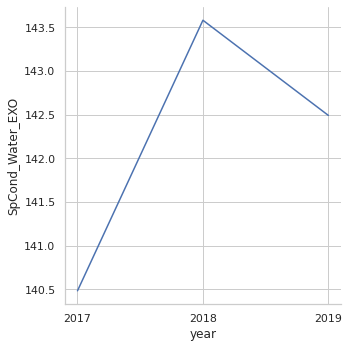

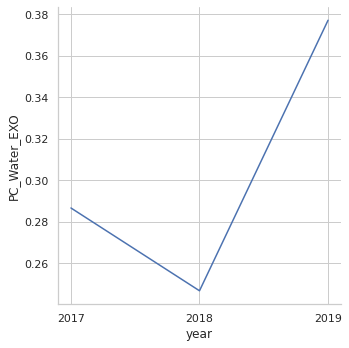

In [39]:
sns.relplot(data=df_mean, x='year', y='SpCond_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

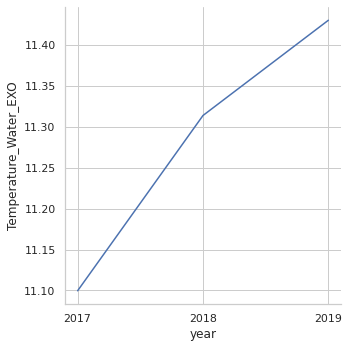

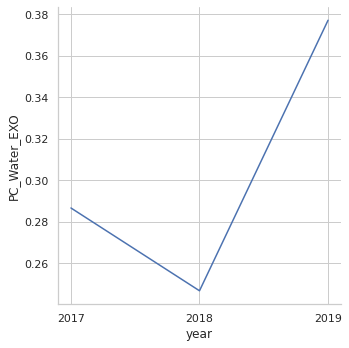

In [40]:
sns.relplot(data=df_mean, x='year', y='Temperature_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

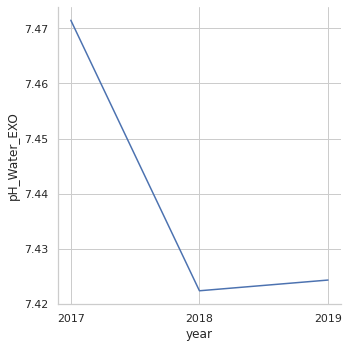

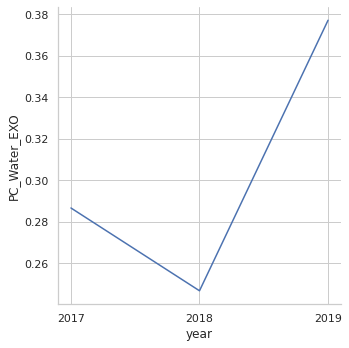

In [41]:
sns.relplot(data=df_mean, x='year', y='pH_Water_EXO', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

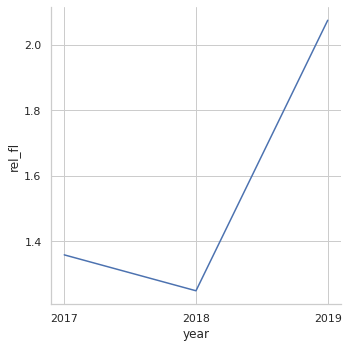

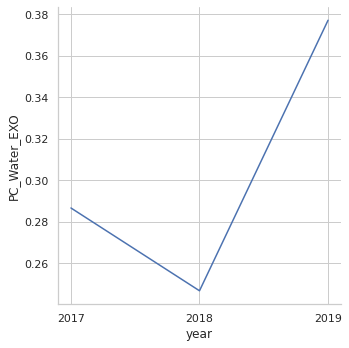

In [42]:
sns.relplot(data=df_mean, x='year', y='rel_fl', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

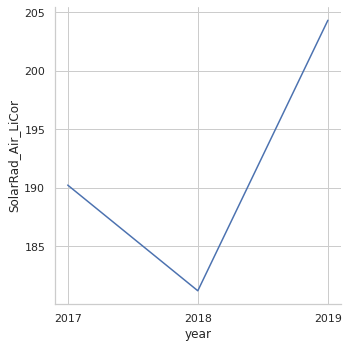

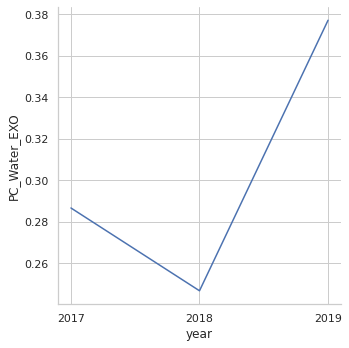

In [43]:
sns.relplot(data=df_mean, x='year', y='SolarRad_Air_LiCor', kind='line')
plt.show()

sns.relplot(data=mean_pc_by_yr, x='year', y='PC_Water_EXO', kind="line")
plt.show()

## Seasonal exploration

1. Spring - March to May.
2. Summer - June to August.
3. Autumn - September to November.
4. Winter - December to February.


In [44]:
def month_to_season(month: int) -> int:
    if month >= 3 and month <= 5:
        return 1
    if month >= 6 and month <= 8:
        return 2
    if month >= 9 and month <= 11:
        return 3
    return 4

In [45]:
df['season'] = df.month.map(month_to_season)

In [46]:
df.columns

Index(['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'PN',
       'season'],
      dtype='object')

In [47]:
season_str = {
    1: 'spring',
    2: 'summer',
    3: 'autumn',
    4: 'winter'
}

df_season_mean = df.groupby(['season','year'], as_index=False)[['PC_Water_EXO', 'Chla_Water_EXO',
                                                       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
                                                       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl',
                                                       'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
                                                       'PP', 'PN']].mean()

df_season_mean['season_str'] = df_season_mean.season.map(lambda x: season_str[x])

In [48]:
df_season_mean

season  year  PC_Water_EXO  Chla_Water_EXO  DO_Water_EXO  DO-Sat_Water_EXO  \
0       1  2017      0.432196        4.362585     12.615707        108.166366   
1       1  2018      0.241366        4.500607     12.737853        106.277000   
2       1  2019      0.285386        2.656125     12.061920        101.095866   
3       2  2017      0.283146        1.841290     10.620052        100.254274   
4       2  2018      0.213709        2.180963     10.908590         99.246183   
5       2  2019      0.416170        1.549279     10.408149         95.780465   
6       3  2017      0.263084        1.315630      9.079184         83.865242   
7       3  2018      0.291686        1.874771      9.328683         86.668714   
8       3  2019      0.299631        1.095876      9.178585         86.064001   
9       4  2017      0.286418        2.002778     10.159874         85.938048   

   SpCond_Water_EXO  Temperature_Water_EXO  pH_Water_EXO    rel_fl  \
0        143.059177               8.474103      7.590430  1.117125   
1        147.451073               7.532225      7.491061  1.202248   
2        142.969250               7.397257      7.673187  1.608510   
3        140.376163              11.615569      7.458314  1.309232   
4        143.707534              11.773239      7.425485  1.211021   
5        142.427657              11.607911      7.426760  2.183275   
6        140.189878              11.247963      7.453201  1.458972   
7        142.157582              11.930987      7.395982  1.312293   
8        142.533319              11.934309      7.359064  1.911599   
9        139.687474               8.019510      7.605566  1.384964   

   SolarRad_Air_LiCor         TP       TSP       SRP        TN       NO3  \
0          193.163431   4.962900  3.034500  3.056325  0.377450  0.517875   
1          220.689446  10.137940  6.800550  4.379800  0.490020  0.310820   
2          189.663682   7.504973  4.290764  1.732800  0.273545  0.147227   
3          247.937987   9.389619  6.102546  4.733118  0.486144  0.392679   
4          228.624199  11.512478  7.077839  4.940027  0.525679  0.306817   
5          235.286042  16.973625  5.910736  3.725781  0.506421  0.274886   
6          133.693469  14.313696  6.115240  4.321052  0.551585  0.356282   
7          106.038491  15.482182  5.073812  3.475208  0.442201  0.231710   
8          129.399131  12.065868  5.203757  3.378703  0.492189  0.311325   
9           47.665465   7.182450  4.131000  2.121750  0.590287  0.183300   

        NH4         PP         PN season_str  
0  0.006925   1.928400  13.148496     spring  
1  0.006820   3.337390  20.688829     spring  
2  0.005518   3.214209  27.435926     spring  
3  0.005826   3.287073  19.495262     summer  
4  0.006741   4.434639  22.468678     summer  
5  0.011579  11.062889  32.135508     summer  
6  0.007387   8.198455  27.083399     autumn  
7  0.007583  10.408369  34.353110     autumn  
8  0.006242   6.862111  24.137670     autumn  
9  0.012925   3.051450  12.167715     winter

### Phosphorus:Nitrogen ratio and Phycocyanin

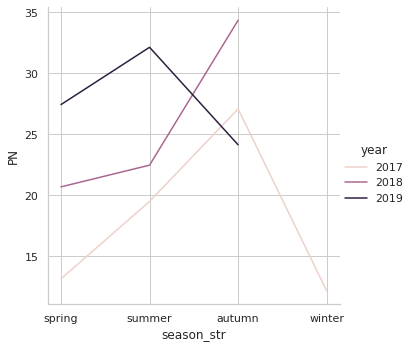

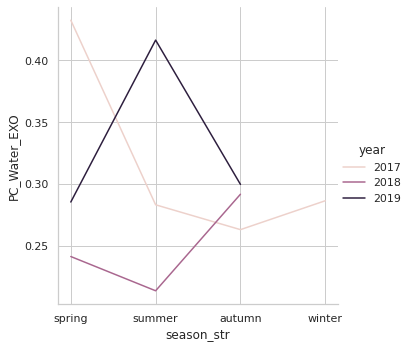

In [49]:
sns.relplot(data=df_season_mean, x='season_str', y='PN', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Chlorophyll-a and Phycocyanin

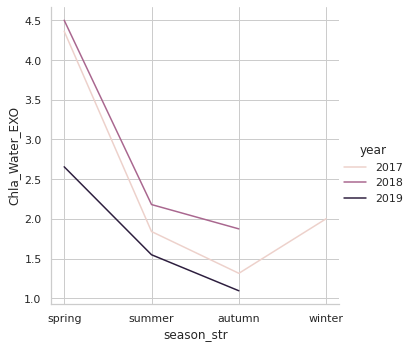

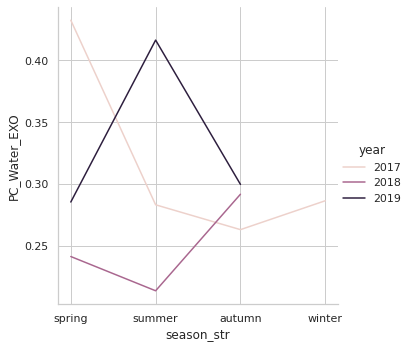

In [50]:
sns.relplot(data=df_season_mean, x='season_str', y='Chla_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Dissolved Oxygen & Phycocyanin

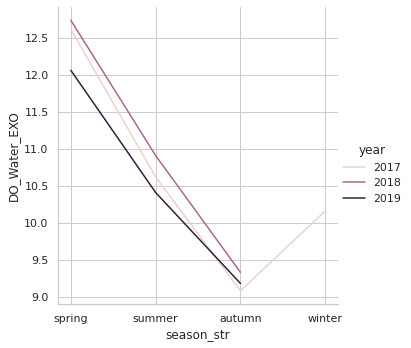

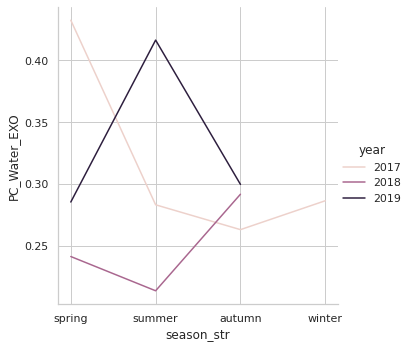

In [51]:
sns.relplot(data=df_season_mean, x='season_str', y='DO_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Dissolved Oxygen Saturation & Phycocyanin

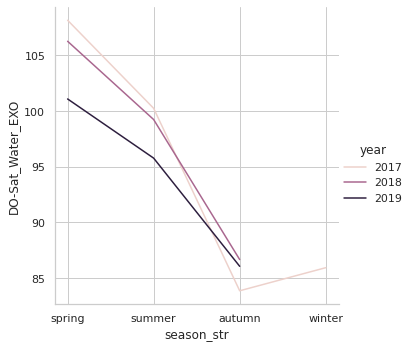

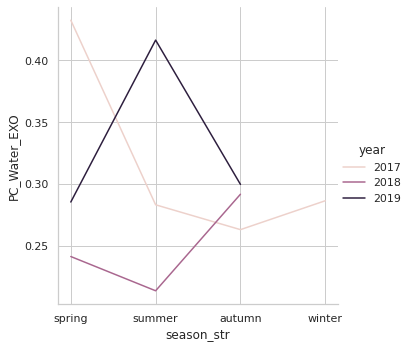

In [52]:
sns.relplot(data=df_season_mean, x='season_str', y='DO-Sat_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Specific Conductance & Phycocyanin

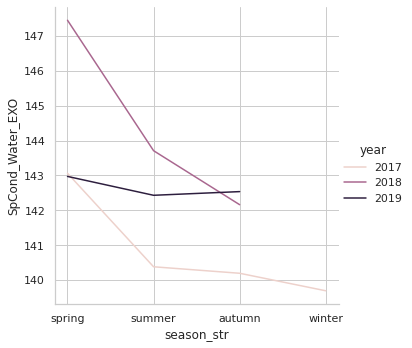

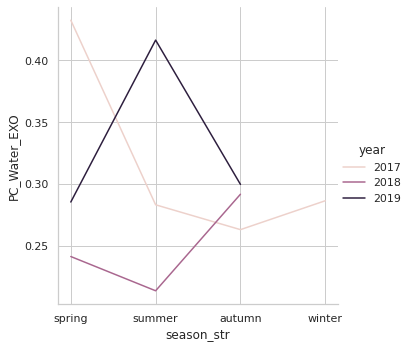

In [53]:
sns.relplot(data=df_season_mean, x='season_str', y='SpCond_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Water temperature & Phycocyanin

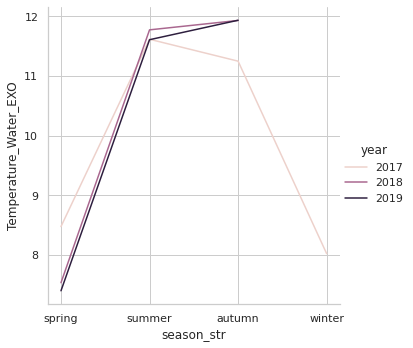

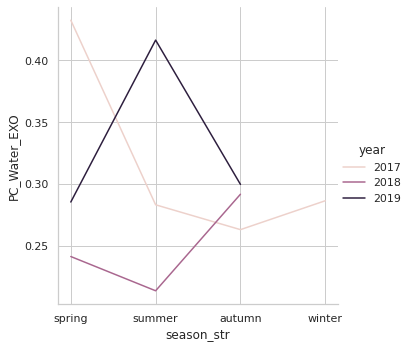

In [54]:
sns.relplot(data=df_season_mean, x='season_str', y='Temperature_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### pH & Phycocyanin

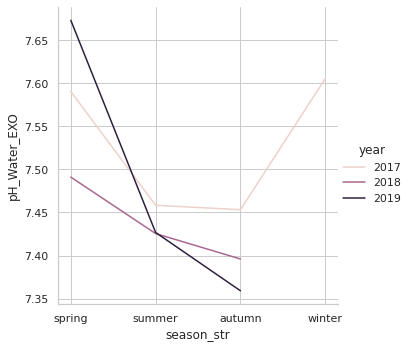

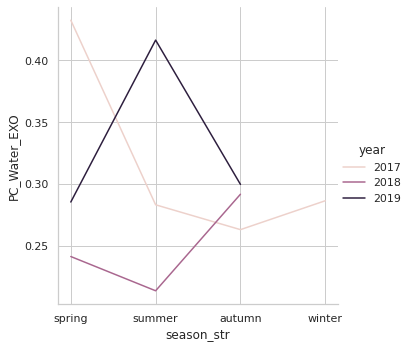

In [55]:
sns.relplot(data=df_season_mean, x='season_str', y='pH_Water_EXO', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Relative fluorescence & Phycocyanin

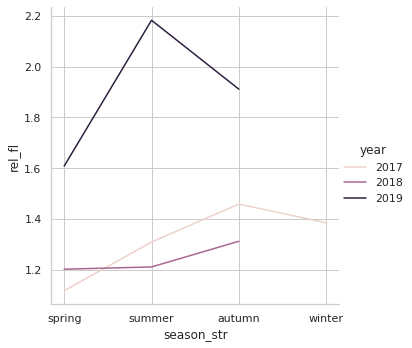

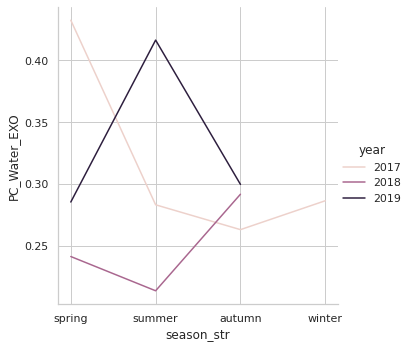

In [56]:
sns.relplot(data=df_season_mean, x='season_str', y='rel_fl', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Solar Radiation & Phycocyanin

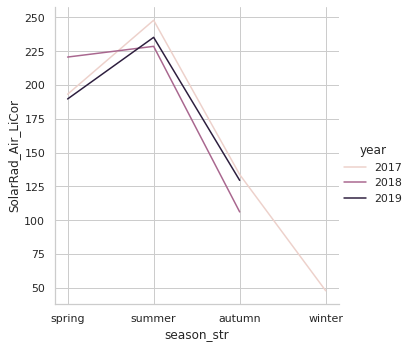

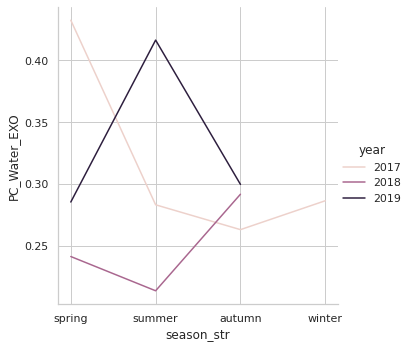

In [57]:
sns.relplot(data=df_season_mean, x='season_str', y='SolarRad_Air_LiCor', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

### Total Phosphorus & Phycocyanin

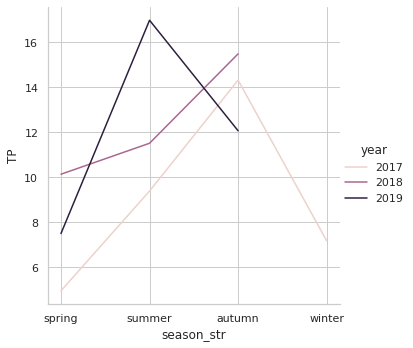

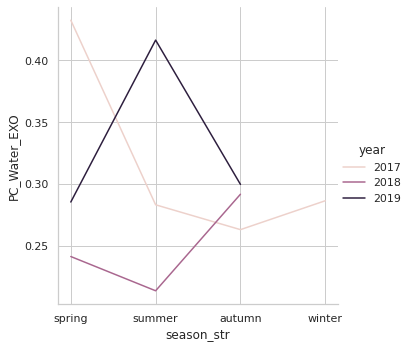

In [58]:
sns.relplot(data=df_season_mean, x='season_str', y='TP', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

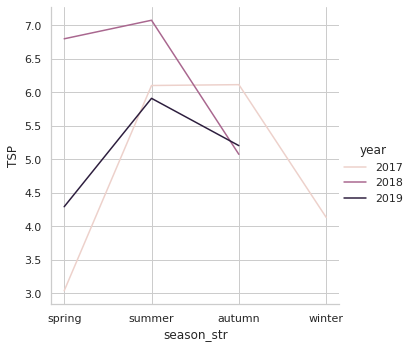

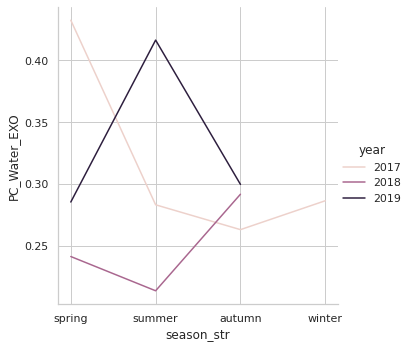

In [59]:
sns.relplot(data=df_season_mean, x='season_str', y='TSP', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

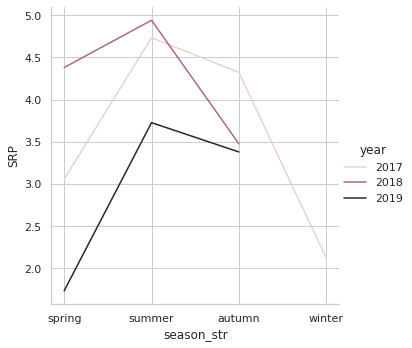

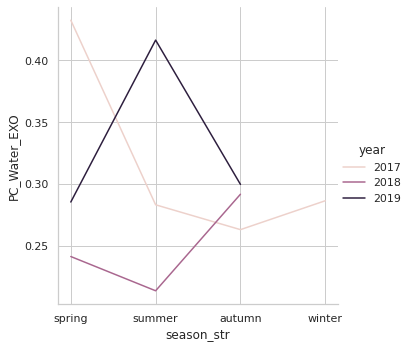

In [60]:
sns.relplot(data=df_season_mean, x='season_str', y='SRP', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

## Observation:

`TSP` and `SRP` are directly proportional

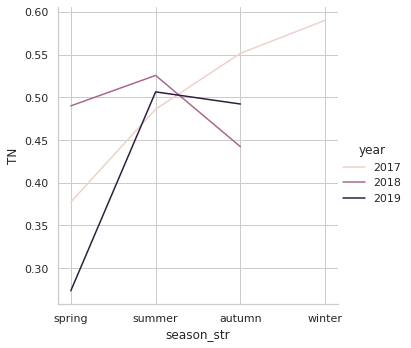

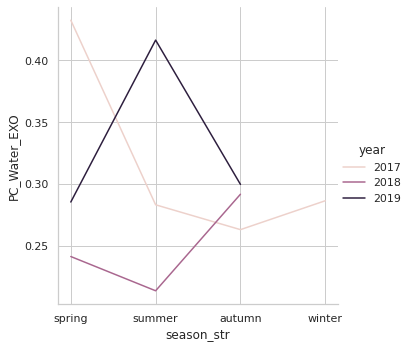

In [61]:
sns.relplot(data=df_season_mean, x='season_str', y='TN', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

## Observation:

Nitrogen is directly proportional to Phycocyanin

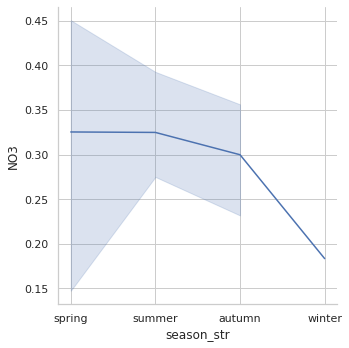

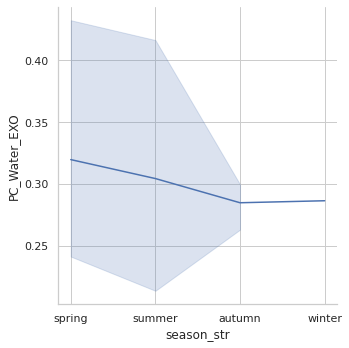

In [62]:
sns.relplot(data=df_season_mean, x='season_str', y='NO3', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

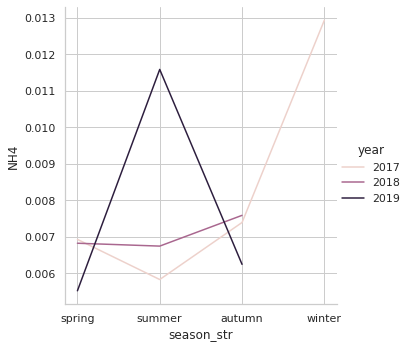

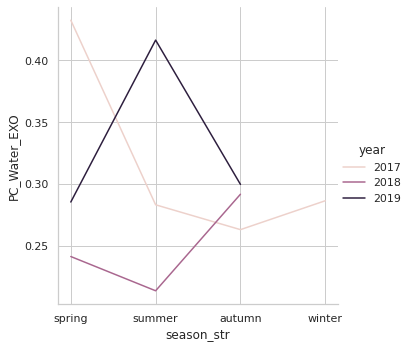

In [63]:
sns.relplot(data=df_season_mean, x='season_str', y='NH4', kind='line', hue='year')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line", hue='year')
plt.show()

## Observation:

Ammonium is directly proportional to Phycocyanin

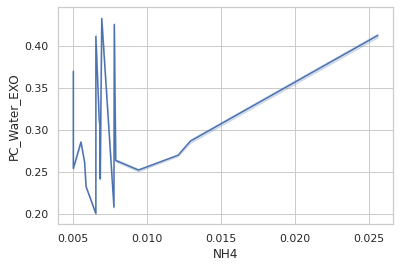

In [64]:
sns.lineplot(data=df[['PC_Water_EXO', 'NH4']], x='NH4', y='PC_Water_EXO')
plt.show()

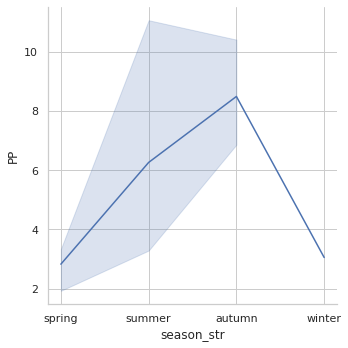

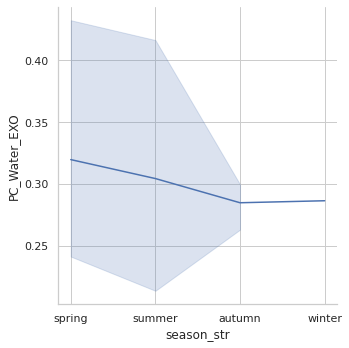

In [65]:
sns.relplot(data=df_season_mean, x='season_str', y='PP', kind='line')
plt.show()

sns.relplot(data=df_season_mean, x='season_str', y='PC_Water_EXO', kind="line")
plt.show()

## Analysis of relation between Phycocyanin and stratification

In [66]:
df.columns

Index(['SensorDepth_Water_EXO', 'PC_Water_EXO', 'Chla_Water_EXO',
       'DO_Water_EXO', 'DO-Sat_Water_EXO', 'SpCond_Water_EXO',
       'Temperature_Water_EXO', 'pH_Water_EXO', 'rel_fl', 'month', 'day',
       'year', 'SolarRad_Air_LiCor', 'TP', 'TSP', 'SRP', 'TN', 'NO3', 'NH4',
       'PP', 'PRECTOTCORR', 'ALLSKY_SFC_SW_DWN', 'ALLSKY_SFC_LW_DWN', 'PN',
       'season'],
      dtype='object')

In [67]:
len(df.SensorDepth_Water_EXO.unique())

8932

In [68]:
depth_df = df.groupby(['SensorDepth_Water_EXO'], as_index=False)['PC_Water_EXO', 'Temperature_Water_EXO'].mean()

/home/achara/achara_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [69]:
depth_df.SensorDepth_Water_EXO.describe()

count    8932.000000
mean       24.631291
std        14.538678
min         0.120000
25%        12.015750
50%        24.016500
75%        37.003250
max        51.546000
Name: SensorDepth_Water_EXO, dtype: float64

AttributeError: 'Poly3DCollection' object has no attribute 'legend_elements'

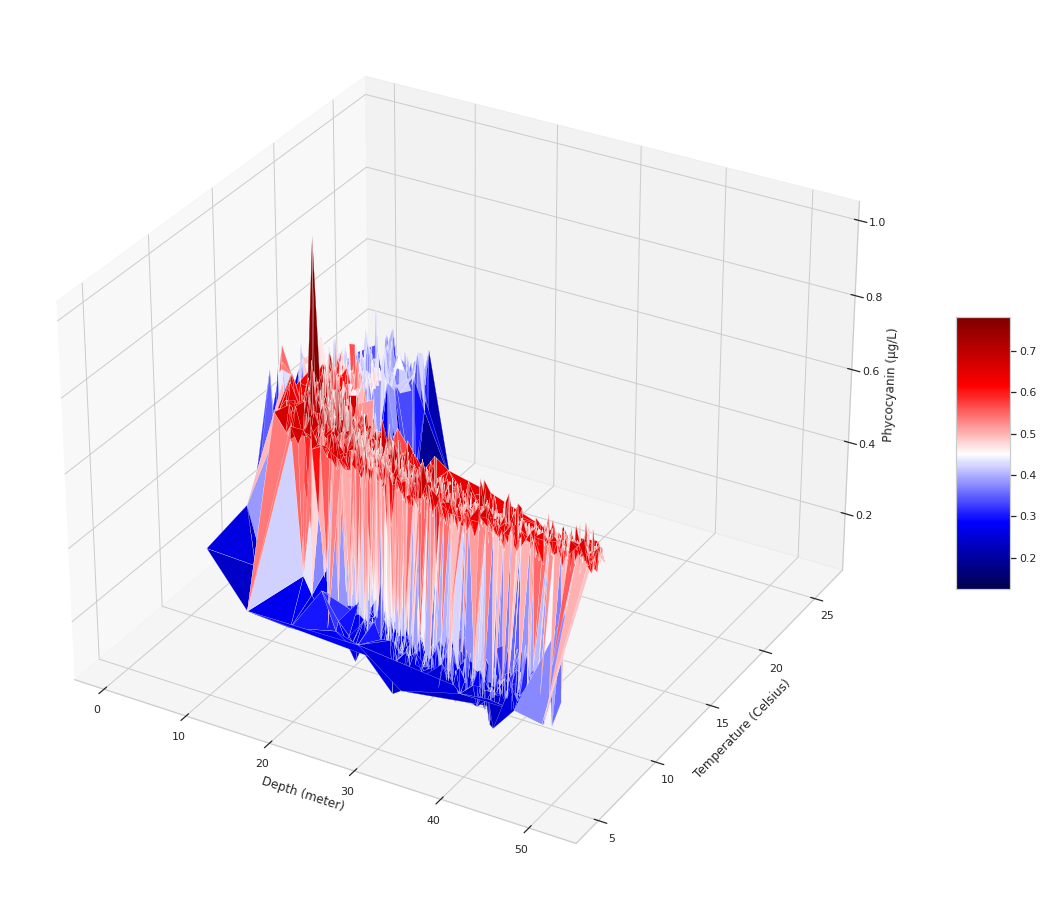

In [109]:
fig = plt.figure(figsize=(20, 20))
plot_axes = plt.axes(projection = '3d')
plot_axes.set_xlabel('Depth (meter)')
plot_axes.set_ylabel('Temperature (Celsius)')
plot_axes.set_zlabel('Phycocyanin (μg/L)')
sc = plot_axes.plot_trisurf(depth_df.SensorDepth_Water_EXO, depth_df.Temperature_Water_EXO, depth_df.PC_Water_EXO, cmap='seismic', linewidth=0.2)
fig.colorbar( sc, shrink=0.25, aspect=5)
plt.legend(*sc.legend_elements())
plt.show()

### Observation:
Phycocyanin concentration reduces with temperature and depth. Ideal range of temperature appears to be between 20 - 25

In [114]:
nitrate_depth_df = df.groupby(['SensorDepth_Water_EXO'], as_index=False)['NO3', 'PC_Water_EXO'].mean()

/home/achara/achara_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [115]:
nitrate_depth_df.head()

SensorDepth_Water_EXO       NO3  PC_Water_EXO
0                  0.120  0.327191      0.391688
1                  0.171  0.327191      0.319568
2                  0.172  0.327191      0.342584
3                  0.173  0.338521      0.373259
4                  0.174  0.341039      0.362531

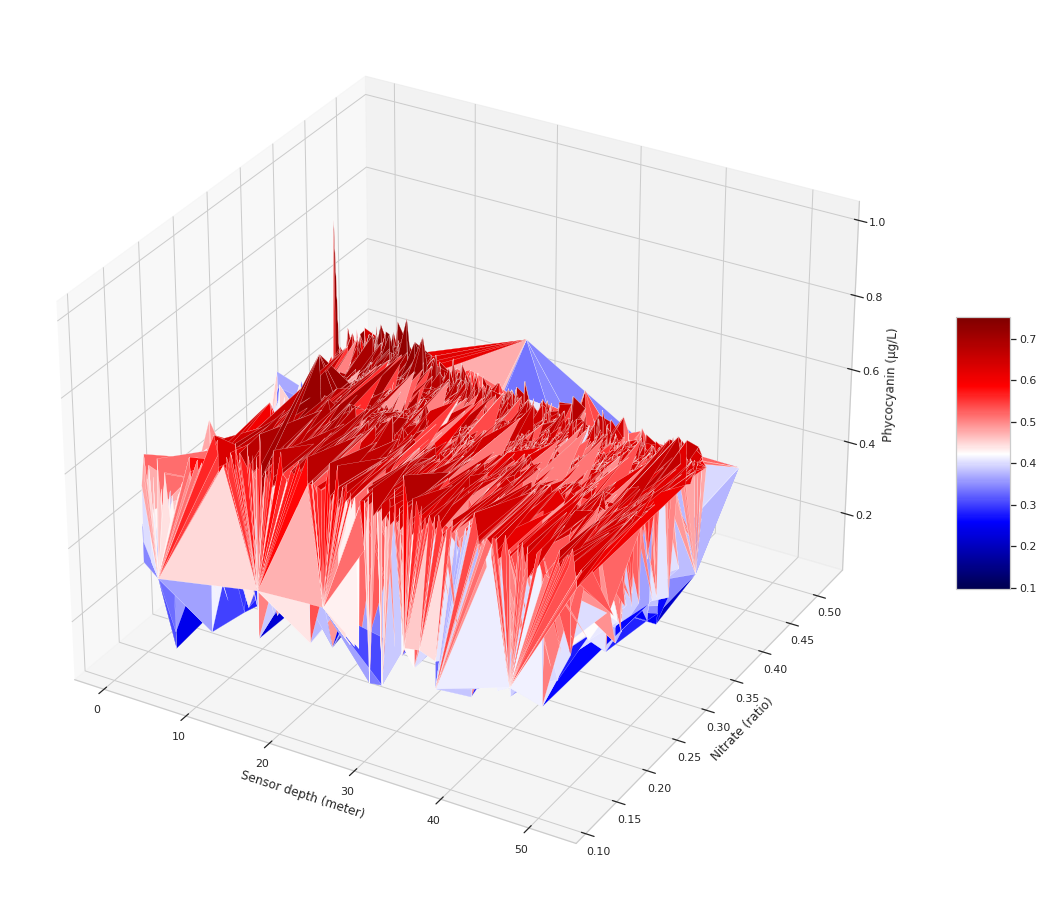

In [116]:
fig = plt.figure(figsize=(20, 20))
plot_axes = fig.gca(projection='3d')
surf = plot_axes.plot_trisurf(nitrate_depth_df.SensorDepth_Water_EXO, nitrate_depth_df.NO3, nitrate_depth_df.PC_Water_EXO, cmap='seismic', linewidth=0.2)
fig.colorbar( surf, shrink=0.25, aspect=5)
plot_axes.set_xlabel('Sensor depth (meter)')
plot_axes.set_ylabel('Nitrate (ratio)')
plot_axes.set_zlabel('Phycocyanin (μg/L)')
plt.show()

## Exploring PC w.r.t `TSP` and depth

In [118]:
tsp_depth_df = df.groupby(['SensorDepth_Water_EXO'], as_index=False)['TSP', 'PC_Water_EXO'].mean()

/home/achara/achara_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


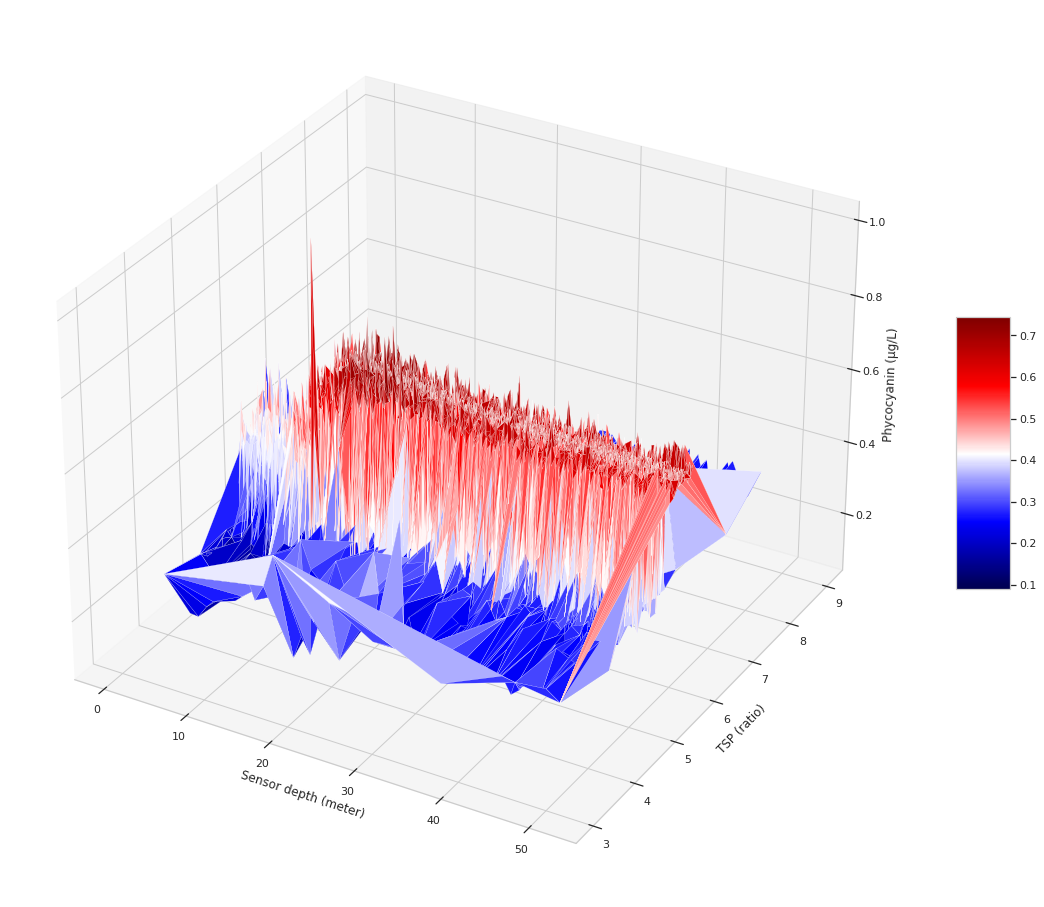

In [119]:
fig = plt.figure(figsize=(20, 20))
plot_axes = fig.gca(projection='3d')
surf = plot_axes.plot_trisurf(tsp_depth_df.SensorDepth_Water_EXO, tsp_depth_df.TSP, tsp_depth_df.PC_Water_EXO, cmap='seismic', linewidth=0.2)
fig.colorbar( surf, shrink=0.25, aspect=5)
plot_axes.set_xlabel('Sensor depth (meter)')
plot_axes.set_ylabel('TSP (ratio)')
plot_axes.set_zlabel('Phycocyanin (μg/L)')
plt.show()

## Exploring PC w.r.t `TN` and depth

In [120]:
tn_depth_df = df.groupby(['SensorDepth_Water_EXO'], as_index=False)[['TN', 'PC_Water_EXO']].mean()

In [121]:
tn_depth_df.head()

SensorDepth_Water_EXO        TN  PC_Water_EXO
0                  0.120  0.526855      0.391688
1                  0.171  0.526855      0.319568
2                  0.172  0.526855      0.342584
3                  0.173  0.514066      0.373259
4                  0.174  0.511224      0.362531

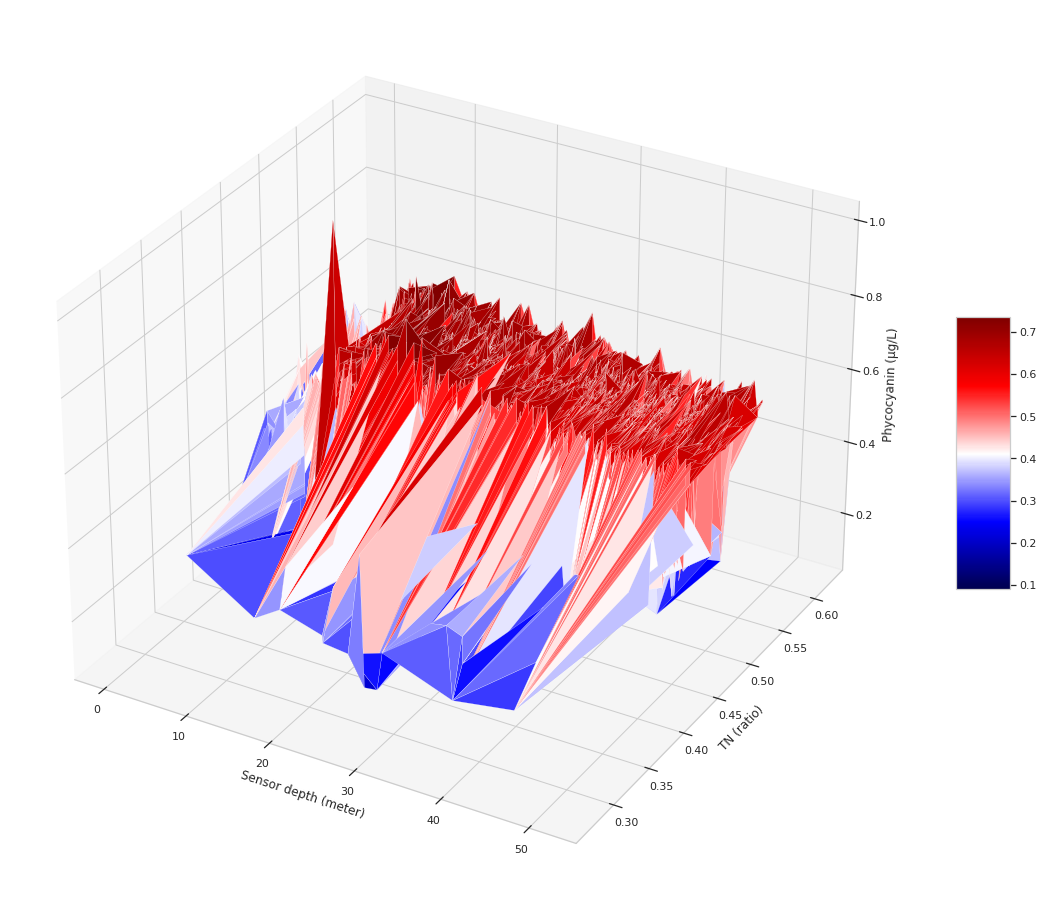

In [122]:
fig = plt.figure(figsize=(20, 20))
plot_axes = fig.gca(projection='3d')
surf = plot_axes.plot_trisurf(tn_depth_df.SensorDepth_Water_EXO, tn_depth_df.TN, tn_depth_df.PC_Water_EXO, cmap='seismic', linewidth=0.2)
fig.colorbar( surf, shrink=0.25, aspect=5)
plot_axes.set_xlabel('Sensor depth (meter)')
plot_axes.set_ylabel('TN (ratio)')
plot_axes.set_zlabel('Phycocyanin (μg/L)')
plt.show()